# Simulador de colas en cine

### Complementos necesarios

In [164]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


### Librerias

In [165]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# ESTABLECIMIENTO DE PARAMETROS

## Cantidad de clientes->

In [166]:
num_personas = 60

## Cantidad de Servidores ->

In [167]:
num_servidores = 3

## Maximo y minimo tiempo de decision de compra por cliente->

In [168]:
min_nivel_paciencia=1
max_nivel_paciencia=2

## Rango de edad->

In [169]:
min=14
max=60

## Tiempo maximo de cobro por parte del empleado

In [170]:
tiempo_general_empleado=3

## Tiempo estimado de llegada por cliente

In [171]:
tiempo_llegada=4

#### Validacion tiempo de llegada

In [172]:
def print_g(text):
    display(HTML(f'<span style="color:green">{text}</span>'))

def print_r(text):
    display(HTML(f'<span style="color:red">{text}</span>'))

def validar_tiempo_llegada(tiempo_llegada):
    resultado = "NO ES VALIDO" if ((1 / tiempo_llegada) / (1 / (2 + tiempo_general_empleado + max_nivel_paciencia))) >= 2 else "VALOR VALIDO"
    
    if "VALOR VALIDO" in resultado:
        print_g(resultado)
    else:
        print_r(resultado)
validar_tiempo_llegada(tiempo_llegada)

#### Creacion de clientes

In [173]:

class Persona:
    ultimo_id = 0
        
    def __init__(self):
        Persona.ultimo_id += 1
        self.id = Persona.ultimo_id
        self.edad = random.randint(min, max)
        self.genero = random.choice(["Femenino", "Masculino"])
        self.nivel_paciencia = random.randint(min_nivel_paciencia, max_nivel_paciencia)
        
    def tiempo_decidir(self):
        return self.edad * 0.02 + self.nivel_paciencia

#### Generacion de n clientes

In [174]:

personas = [Persona() for _ in range(num_personas)]

# Crear DataFrame
df_personas = pd.DataFrame(
    data={
        "Identificacion": [persona.id for persona in personas],
        "Edad": [persona.edad for persona in personas],
        "Genero": [persona.genero for persona in personas],
        "Nivel_Paciencia": [persona.nivel_paciencia for persona in personas],
        "Tiempo_Decidir (min)": [persona.tiempo_decidir() for persona in personas]
    }
)

In [175]:
df_personas

,Identificacion,Edad,Genero,Nivel_Paciencia,Tiempo_Decidir (min)
0,1,46,Femenino,1,1.92
1,2,57,Masculino,1,2.14
2,3,26,Masculino,2,2.52
3,4,55,Femenino,2,3.10
4,5,36,Femenino,2,2.72
5,6,17,Masculino,1,1.34
6,7,24,Masculino,1,1.48
7,8,45,Masculino,2,2.90
8,9,57,Masculino,2,3.14
9,10,50,Femenino,1,2.00


#### Creación de empleados

In [176]:
import random

class Empleado:
    ultimo_id = 0
        
    def __init__(self):
        Empleado.ultimo_id += 1
        self.id = Empleado.ultimo_id
        self.experiencia = random.randint(50, 100) / 100  # Genera un número entre 50 y 100 y lo convierte en decimal
        #donde 100:0 experiencia, 99:1 de experiencia, y seguido hasta 50:50 de experiencia.
        self.tiempo_general = tiempo_general_empleado
        
    def tiempo_promedio(self):
        return self.tiempo_general * self.experiencia


# Servidores

#### Generación de empleados en base a los servidores

In [177]:
empleados = [Empleado() for _ in range(num_servidores)]

In [178]:
df_empleados = pd.DataFrame(
    data={
        "Identificacion": [empleado.id for empleado in empleados],
        "Experiencia": [empleado.experiencia for empleado in empleados],
        "Tiempo general de Empleado (min)": [empleado.tiempo_general for empleado in empleados],
        "Tiempo promedio de Empleado (min)": [empleado.tiempo_promedio() for empleado in empleados]
    }
)

In [179]:
df_empleados

,Identificacion,Experiencia,Tiempo general de Empleado (min),Tiempo promedio de Empleado (min)
0,1,0.63,3,1.89
1,2,0.61,3,1.83
2,3,0.85,3,2.55


In [180]:
def persona_llega(env, persona, df_empleados, df_resultados):
    tiempo_decision = persona["Tiempo_Decidir (min)"]

    # Seleccionar un empleado al azar
    empleado = df_empleados.sample().iloc[0]

    tiempo_empleado = empleado["Tiempo promedio de Empleado (min)"]

    yield env.timeout(tiempo_decision + tiempo_empleado)

    df_resultados.loc[len(df_resultados)] = [persona["Identificacion"],persona["Genero"], empleado["Identificacion"],persona["Edad"], tiempo_decision + tiempo_empleado]

In [181]:
def simular_cola(df_personas, df_empleados):
    env = simpy.Environment()
    df_resultados = pd.DataFrame(columns=["Id_Persona","Genero", "Id_Empleado","Edad", "Tiempo_Total_Servicio(Ts)"])

    for _, persona in df_personas.iterrows():
        env.process(persona_llega(env, persona, df_empleados, df_resultados))

    env.run(until=100)  # Ajusta este valor según sea necesario

    return df_resultados

In [182]:
df_resultados_simulacion = simular_cola(df_personas, df_empleados)

In [183]:
df_resultados_simulacion=df_resultados_simulacion.sort_values(by="Id_Persona")
df_resultados_simulacion

,Id_Persona,Genero,Id_Empleado,Edad,Tiempo_Total_Servicio(Ts)
10,1,Femenino,1.0,46,3.81
20,2,Masculino,1.0,57,4.03
32,3,Masculino,1.0,26,4.41
50,4,Femenino,2.0,55,4.93
55,5,Femenino,3.0,36,5.27
11,6,Masculino,3.0,17,3.89
4,7,Masculino,1.0,24,3.37
56,8,Masculino,3.0,45,5.45
53,9,Masculino,1.0,57,5.03
37,10,Femenino,3.0,50,4.55


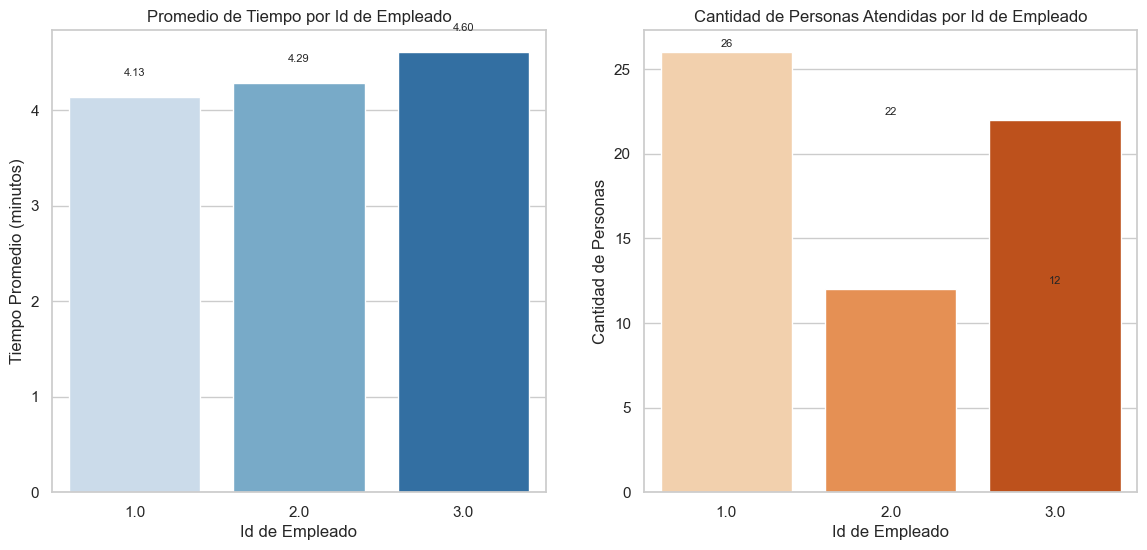

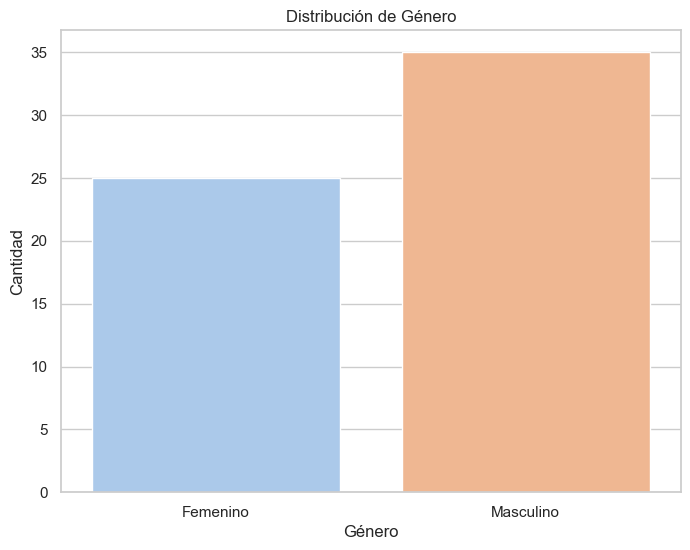

<Figure size 640x480 with 0 Axes>

In [184]:
# Calcular el promedio de tiempo por Id de Empleado
promedio_tiempo = df_resultados_simulacion.groupby('Id_Empleado')['Tiempo_Total_Servicio(Ts)'].mean().reset_index()

# Contar la cantidad de personas atendidas por empleado
cantidad_personas = df_resultados_simulacion['Id_Empleado'].value_counts().reset_index()
cantidad_personas.columns = ['Id_Empleado', 'Cantidad_Personas']

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear las gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfica del promedio de tiempo por Id de Empleado
sns.barplot(x='Id_Empleado', y='Tiempo_Total_Servicio(Ts)', data=promedio_tiempo, palette='Blues', ax=axes[0])
axes[0].set_title('Promedio de Tiempo por Id de Empleado')
axes[0].set_xlabel('Id de Empleado')
axes[0].set_ylabel('Tiempo Promedio (minutos)')

# Añadir valores en las barras
for index, value in enumerate(promedio_tiempo['Tiempo_Total_Servicio(Ts)']):
    axes[0].text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Gráfica de la cantidad de personas atendidas por empleado
sns.barplot(x='Id_Empleado', y='Cantidad_Personas', data=cantidad_personas, palette='Oranges', ax=axes[1])
axes[1].set_title('Cantidad de Personas Atendidas por Id de Empleado')
axes[1].set_xlabel('Id de Empleado')
axes[1].set_ylabel('Cantidad de Personas')

# Añadir valores en las barras
for index, value in enumerate(cantidad_personas['Cantidad_Personas']):
    axes[1].text(index, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=8)

# Gráfico de barras para la distribución de género
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Genero', data=df_resultados_simulacion, palette='pastel')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()
    

plt.tight_layout()
plt.show()

In [185]:
df_resultados_simulacion.to_excel('datos_resultados.xlsx', index=False)